# Replication Baskaran & Hessami (2018)

**Disclaimer: This replication is work in progress, tentative and incomplete.**

This notebook contains a replication of Baskaran, T., & Hessami, Z. (2018) Does the Election of a Female Leader Clear the Way for More Women in Politics? *American Economic Journal: Economic Policy*, 10(3): 91-121.

For this purpose, first, data and method used as well as the key results are summarized briefly. Second, descriptive and graphical analyses are presented in preparation of third, a replication of the key results of the paper.  

## 0. Excecutive summary of the paper
* **Observation:** *Anti-female voter bias* results in **underrepresentation of females in politics**.


* **Research Hypothesis:** Exposure to a female mayor deminishes *anti-female biases* of voters.


* **Identification problems:**

    * Other potential drivers of this observation:
        - Political parties influence election outcomes. Thus, underrepresentation might be caused by *anti-female party biases*
        - Parties might anticipate *anti-female voter bias* and, therefore, are less willing to field female candidates in competitive races.
        - Women who expect discrimination might be reluctand to run for election/ pursue a career in politics in the first place. 

    * Isolating *anti-female voter bias*: Rule out alternative explanations
        - (a) Initial ranks of candidates does not impact their rank advancements
        - (b) Characteristics of women on party's list chage only little in case there is a female mayor in office
        - (c) Number of female candidates on list remains unchanged
        - (a), (b), and (c) indicate little *anti-female party bias*
        

* **Data:**

    * Data on local council election in the German state of Hesse.
        - Open-list electoral system (parties specify order of candidates, voters can preferential votes to individual candidates).
        - Includes gender, list ranks, personal characteristics among other information for ~109.017 candidates who competed in 2001, 2006, 2011, or 2016 elections
    
    * Data on mayor elections for all 426 municipalities in Hesse, including the elected mayor's gender and the margin the election was won by.
    
    
* **Method:**

    * Authors use a regression discontinuity design (RDD) to study the causal effects of female mayors on subsequent council election results.
    
    * The discontinuity is provided by close mixed-gender mayoral elections.
    
    * estimated model equation: 
     > $rank \, improvement_{k, i, t} = \alpha + \beta female \, mayor_{i, t} + f(vote \, margin)_{i, t} + female \, mayor_{i, t} \times  g(vote \, margin)_{i, t} + \epsilon_{k, i, t}$
     
     Where 
         - $rank \, improvement_{k, i, t}$ is the normalized rank improvement of candidate $k$ in municipality $i$ and local election year $t$.
         - $vote \, margin_{i, t}$ is the margin of victory of the female candidate in the preceeding mayoral election (negative values, thus, denote a loss of the female candidate).
         - $female \, mayor_{i, t}$ is a dummy that takes value 1 if a female candiate has won the mayoral election preceeding the council election $(female \, mayor_{i, t} = 1,$ *iff* $vote \, margin_{i, t} > 0)$.
         
     **TODO:** This is probably the appropriate place for the causal graph representing the model.


* **Results:**
    * A female candidate winning a close mixed-gender mayoral election causes...
        
        - voters to give preferential votes to female council candidates.
    
        - a 4 percentage points higher share of female council members.
        
        - positive spillover effects on female council candidates in neighboring municipalities.
       

## 1. Descriptive and Graphical Analyses
Import the main dataset as it is provided by the authors.

In [5]:
# Import packages needed for subsequent analyses
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt

# Import main dataset and print first ten rows
df_main_dataset = pd.DataFrame(data = pd.read_stata("data\main_dataset.dta"))
df_main_dataset.head(10)


,gkz,jahr,gkz_jahr,rdd_sample,female,elected,gewinn_norm,gewinn,gewinn_dummy,listenplatz_norm,joint_party,age,non_university_phd,university,phd,architect,businessmanwoman,engineer,lawyer,civil_administration,teacher,employed,selfemployed,student,retired,housewifehusband,incumbent_council,wahlbet,party,female_mayor,margin_1,inter_1,margin_2,inter_2,female_mayor_full_sample,sum_years_as_mayor,mayor_age,mayor_university,mayor_employment,log_bevoelkerung,log_flaeche,log_debt_pc,log_tottaxrev_pc,log_gemeinde_beschaef_pc,log_female_sh_gem_besch,log_tot_beschaeft_pc,log_female_share_totbesch,log_prod_share_tot,log_female_share_prod
0,411000,2001.0,4110002001,NaN,0.0,1.0,1.408451,1.0,1.0,4.225352,0.0,58.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.5,fdp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
1,411000,2001.0,4110002001,NaN,0.0,0.0,2.816901,2.0,1.0,12.676056,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,os,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
2,411000,2001.0,4110002001,NaN,0.0,0.0,-8.450705,-6.0,0.0,36.619717,0.0,39.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.5,gruene,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
3,411000,2001.0,4110002001,NaN,0.0,0.0,-4.225352,-3.0,0.0,25.352112,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,gruene,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
4,411000,2001.0,4110002001,NaN,0.0,0.0,1.408451,1.0,1.0,29.577465,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,uffbasse,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
5,411000,2001.0,4110002001,NaN,0.0,1.0,0.000000,0.0,0.0,1.408451,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,fdp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
6,411000,2001.0,4110002001,NaN,0.0,0.0,1.408451,1.0,1.0,8.450705,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,pds-dkp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
7,411000,2001.0,4110002001,NaN,0.0,0.0,-8.450705,-6.0,0.0,36.619717,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,os,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
8,411000,2001.0,4110002001,NaN,1.0,1.0,0.000000,0.0,0.0,1.408451,0.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,49.5,gruene,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217
9,411000,2001.0,4110002001,NaN,0.0,0.0,15.492958,11.0,1.0,57.746479,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,49.5,fdp,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,11.836761,4.805904,0.732735,-0.134298,-3.653085,-0.71974,-0.456145,-0.820801,-1.224465,-1.244217


In a first step, in order to get a better understanding of the data provided, the relationship of the margin of victory of the female mayor (abscissa) and the rank improvements of female candidates in the subsequent council election (ordinate) is illustrated. For this exercise, only data on council elections that subceeded mixed gender mayor elections will be used (mayor elections in which two top candidates were of opposite gender). In addition, only rank improvements of female council candidates are of interest for this analysis and are, therefore, included in the illustration below. 

Note that for easier interpretability *rank improvements* in the council elections are provided in a normalized form, facilitating comparability of changes in ranks of candidates between councils of different sizes. This conversion follows the equation: 

$ rank \, improvement = (\frac{initial \, rank - final \, rank}{council \, size}) \times 100. $



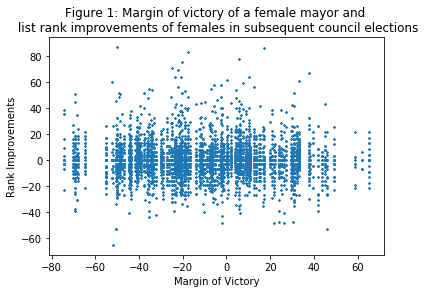

In [18]:
# Create a dataset that only contains observations on (a) mixed gender mayor elections and 
# (b) on rank improvements of female council candidates.
rdd_data = df_main_dataset.loc[(df_main_dataset.female == 1) & (df_main_dataset.rdd_sample == 1)]

# Get the number of observations of mixed gender mayor elections.
N = len(rdd_data.loc[rdd_data[['gkz', 'jahr']].drop_duplicates().index])

####TODO: This plot creation can be done using an auxiliary function for better readability of this notebook. 
####TODO: Some of the gaps (especially in the vertical dimension) might be due to a resolution problem when displaying the image.
####TODO: Hence, zoom in to check. Maybe one more reason to export this code into aux and import the figure as png.
# Create a scatter plot that shows all combinations of the margin of victory of a female 
# in a mixed gender mayor lection and the rank improvements of female candidates in subsequent council elections.
plt.scatter(x=rdd_data['margin_1'], y=rdd_data['gewinn_norm'], marker = 'x', s=3)
plt.title(label='Figure 1: Margin of victory of a female mayor and \n list rank improvements of females in subsequent council elections')
plt.xlabel('Margin of Victory')
plt.ylabel('Rank Improvements')
plt.show()